# CPS305 Fall 2019
## Lab $06$ Report
## Parth Patel, Std ID 500890698

26 October 2019

# Introduction and Overall Comments

This is the submission of Lab 06.

## Answers for exercise 1 

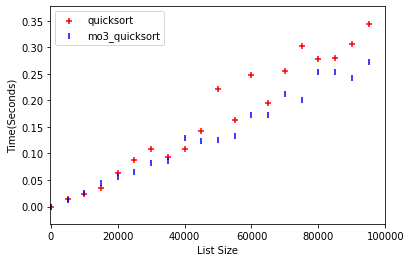

In [2]:
import timeit
import random
import matplotlib.pyplot as plt

timesQS = []
timesMO3 = []
listSize = []

def quickSort(alist):
    quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
    if first<last:
        splitpoint = partition(alist,first,last)
        quickSortHelper(alist,first,splitpoint-1)
        quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
    pivotvalue = alist[first]

    leftmark = first+1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp


    return rightmark



def mo3_quickSort(alist):
    mo3_quickSortHelper(alist,0,len(alist)-1)

def mo3_quickSortHelper(alist,first,last):
    
    if first<last:

        splitpoint = mo3_partition(alist,first,last)

        mo3_quickSortHelper(alist,first,splitpoint-1)
        mo3_quickSortHelper(alist,splitpoint+1,last)


def insertionSort(alist):
    for i in range(1,len(alist)):
        currVal = alist[i]
        pos = i
        while pos>0 and currVal<alist[pos-1]:
            alist[pos]=alist[pos-1]
            pos = pos-1
        alist[pos] = currVal
    return alist

def mo3_partition(alist,first,last):
    middle = (last-first)//2 +first
    median = [alist[first], alist[middle], alist[last]]
    median = insertionSort(median)

    pivotvalue = median[1]

    if (pivotvalue == alist[middle]):
        alist[first], alist[middle] = alist[middle], alist[first]
    elif (pivotvalue == alist[last]):
        alist[first], alist[last] = alist[last], alist[first]

    leftmark = first+1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp


    return rightmark

        
def plotGraph(listSize,timesQS,timesMO3):
    plt.scatter(listSize, timesQS, marker='+', c='r', label = "quicksort")
    plt.scatter(listSize, timesMO3, marker='|', c='b', label = "mo3_quicksort")
    plt.ylabel("Time(Seconds)")
    plt.xlabel("List Size")
    plt.xlim(-100,100000)
    plt.legend()
    plt.show()

for i in range(0, 100000, 5000):
    listA = [random.randint(0,i) for x in range(i+1)]
    qsTime = timeit.Timer("quickSort(listA)", "from __main__ import listA,quickSort")
    mo3Time = timeit.Timer("mo3_quickSort(listA)", "from __main__ import listA,mo3_quickSort")
    timesQS.append(qsTime.timeit(number=1))
    timesMO3.append(mo3Time.timeit(number=1))
    listSize.append(i)
plotGraph(listSize,timesQS,timesMO3)

**Discussion of the Results**
1. I found median of the the middle, first and last numbers in the list by storing them in a list and sorting it. Then I took the second value in the list and made it the pivot value. Then I checked to make sure the pivot value was at the start of the list(if the pivot was set to the middle or last values). The graph shows that as the size of the list increase mo3_quicksort is a little bit faster than quicksort. mo3_quicksort just makes it so that you don't hit the worse case scenario of n^2 as often which is why it is a bit faster than quicksort.